In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
gold = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


SPX = indies

GLD = gold price

EUR/USD = ratio of euro vs us dollar

SLV = silver price


In [5]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold.shape

(2290, 6)

In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation

In [10]:
correlation = gold.corr()

In [11]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

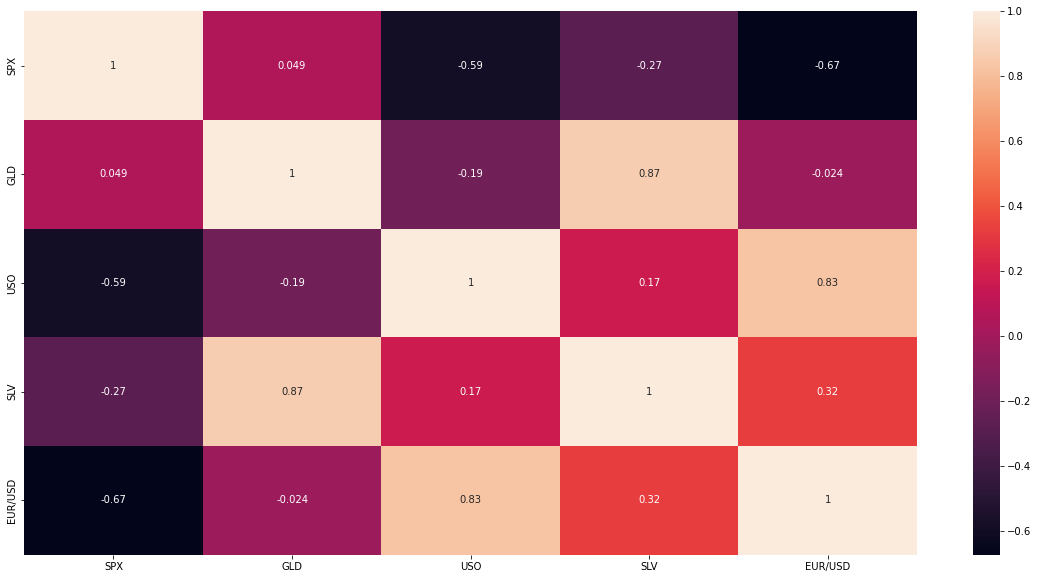

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cbar=True)

In [13]:
# correlation with gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

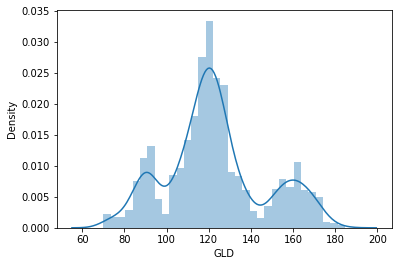

In [14]:
sns.distplot(gold['GLD'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
x = gold.drop(['Date','GLD'], axis = 1)
y = gold['GLD']

In [17]:
print(x.shape)

print(y.shape)

(2290, 4)
(2290,)


In [18]:
x_train,x_test,y_train,y_test= train_test_split(x, y ,test_size=0.3, random_state= 2 )

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
reg = RandomForestRegressor()


In [21]:
reg.fit(x_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [22]:
test_data = reg.predict(x_test)

In [23]:
print(test_data)

[168.74980025  81.83520004 115.9581999  127.29530087 120.61510169
 154.51609828 150.36900048 126.25809961 117.81039882 125.98750104
 116.00420096 172.05540116 141.92829889 167.73129803 115.37320007
 117.72690043 136.84410324 170.30670098 159.0128034  161.86829949
 155.05410059 125.72710023 174.00390087 156.78100221 125.05140102
  94.08859936  77.46419965 120.16490033 119.29970009 167.1095008
  88.61669875 125.52110131  91.02570047 117.71869972 121.14359947
 136.77910067 115.48620118 116.79670095 149.18849976 107.69850075
 104.10500215  87.21559776 126.65620028 117.54649956 153.36179872
 119.85869978 108.35390076 108.10279802  93.13170006 127.17569737
  74.80290026 113.75959952 120.89319983 111.2268987  118.86089869
 120.48719977 160.51980005 167.87040133 146.81689632  86.51919965
  94.08899998  86.8301986   90.68070012 118.66130113 126.47820088
 127.79709956 167.84569975 122.13549906 117.15569929  99.67779953
 168.01830142 142.75929787 131.33910246 121.23980184 122.29789936
 119.937500

In [24]:
error_score = metrics.r2_score(y_test,test_data)
error_score

0.9897265721434794

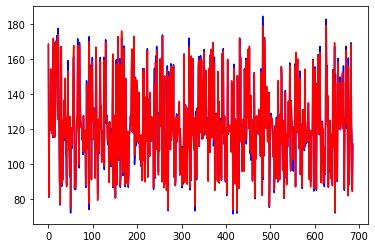

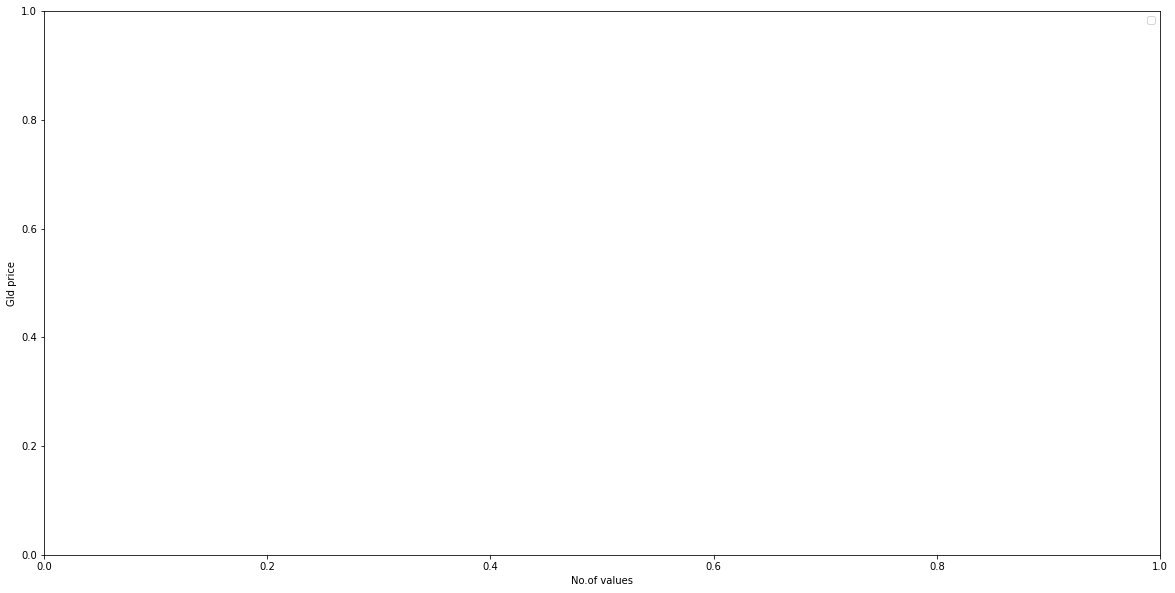

In [25]:
y_test = list(y_test)
plt.plot(y_test, color = 'Blue', label = 'Actual value')
plt.plot(test_data, color = 'Red', label = 'predictied values')
plt.figure(figsize=(20,10))
plt.xlabel('No.of values')
plt.ylabel('Gld price')
plt.legend()
plt.show()